# Regular expression for buiding a dataset about "homicides"  and a few data explorations

## Part 1. Using regex for gathering data from each variable

In [1]:
import pandas as pd
import re
import numpy as np

### Reading raw text

In [2]:
file = open('homicides.txt', mode ='r', encoding = 'utf8')
data = [row for row in file]

### Collecting addresses

In [3]:
addresses = []

for row in data:
    match = re.search(r'"address">([\w \d .]+)', row)
    
    if match:
        addresses.append(match.group(1))
    else:
        address.append(np.nan)
        
print(addresses[0:11])

['3400 Clifton Ave.', '4900 Challedon Road', '2000 West North Ave', '5900 Northwood Drive', '500 Maude Ave.', '5200 Ready Ave.', '300 West North Ave.', '1800 North Montford Ave.', '5100 Harford Road', '3100 Ravenwood Road', '4500 Fairfax Road']


### Collecting ages

In [4]:
ages = []

for row in data:
    match = re.search(r'(\d+) years? old', row)
    
    if match:
        ages.append(int(match.group(1)))
    else:
        ages.append(np.nan)
        
print(ages[0:10])

[17, 26, 44, 21, 61, 46, 27, 21, 16, 21]


### Collecting "found" dates

In [5]:
founds = []

for row in data:
    match = re.search(r'Found \w+? ([\w \d ,]+)', row, flags=re.I)
    
    if match:
        founds.append(match.group(1))
    else:
        founds.append(np.nan)
        
print(founds[0:11])

['January 1, 2007', 'January 2, 2007', 'January 2, 2007', 'January 3, 2007', 'January 5, 2007', 'January 5, 2007', 'January 5, 2007', 'January 7, 2007', 'January 8, 2007', 'January 8, 2007', 'January 9, 2007']


### Collecting causes

In [6]:
causes = []

for row in data:
    match = re.search(r'Cause: ([\w . -]+)', row)
    
    if match:
        causes.append(match.group(1))
    else:
        causes.append(np.nan)
        
print(causes[23:51])

['shooting', 'shooting', 'shooting', 'asphyxiation', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'stabbing', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting', 'shooting']


### Collecting genders

In [7]:
genders = []

for row in data:
    match = re.search(r'(\w+? (male|female)),? \d+ years? old', row)
    
    if match:
        genders.append(match.group(1))
    else:
        genders.append(np.nan)
        
print(genders[0:31])

['black male', 'black male', 'black female', 'black male', 'white male', 'black male', 'black male', 'black male', 'black male', 'black male', 'black male', 'black male', 'white female', 'black male', 'black male', 'black male', 'black male', 'black female', 'black male', 'black male', 'black male', 'black male', 'black male', 'black male', 'black male', 'black male', 'hispanic female', 'white female', 'black male', 'black male', 'black male']


### Collecting reasons for death

In [8]:
death = []

for row in data:
    match = re.search(r'died at? ([\w - .]+)', row, flags=re.I)
    
    if match:
        death.append(match.group(1))
    else:
        death.append(np.nan)
        
print(death[0:10])

['Shock Trauma', 'scene', 'scene', 'scene', 'scene', 'JHH', 'UMMC', 'JHH', 'Bayview', 'JHH']


## Part 2. Preparing the right form of input data for creating a DataFrame in Pandas

In [9]:
clean_data  = []
for i in range(len(data)):
    clean_data.append([addresses[i], genders[i], ages[i], founds[i], death[i], causes[i]])
clean_data[0:10]

[['3400 Clifton Ave.',
  'black male',
  17,
  'January 1, 2007',
  'Shock Trauma',
  'shooting'],
 ['4900 Challedon Road',
  'black male',
  26,
  'January 2, 2007',
  'scene',
  'shooting'],
 ['2000 West North Ave',
  'black female',
  44,
  'January 2, 2007',
  'scene',
  'blunt force'],
 ['5900 Northwood Drive',
  'black male',
  21,
  'January 3, 2007',
  'scene',
  'asphyxiation'],
 ['500 Maude Ave.',
  'white male',
  61,
  'January 5, 2007',
  'scene',
  'blunt force'],
 ['5200 Ready Ave.', 'black male', 46, 'January 5, 2007', 'JHH', 'shooting'],
 ['300 West North Ave.',
  'black male',
  27,
  'January 5, 2007',
  'UMMC',
  'shooting'],
 ['1800 North Montford Ave.',
  'black male',
  21,
  'January 7, 2007',
  'JHH',
  'shooting'],
 ['5100 Harford Road',
  'black male',
  16,
  'January 8, 2007',
  'Bayview',
  'shooting'],
 ['3100 Ravenwood Road',
  'black male',
  21,
  'January 8, 2007',
  'JHH',
  'shooting']]

In [10]:
# homi is short for homicide
homi = pd.DataFrame(clean_data, columns = ['address', 'gender', 'age', 'found', 'death', 'cause'])

In [11]:
homi

,address,gender,age,found,death,cause
0,3400 Clifton Ave.,black male,17.0,"January 1, 2007",Shock Trauma,shooting
1,4900 Challedon Road,black male,26.0,"January 2, 2007",scene,shooting
2,2000 West North Ave,black female,44.0,"January 2, 2007",scene,blunt force
3,5900 Northwood Drive,black male,21.0,"January 3, 2007",scene,asphyxiation
4,500 Maude Ave.,white male,61.0,"January 5, 2007",scene,blunt force
...,...,...,...,...,...,...
1245,1000 Renick Ct,NaN,35.0,"January 8, 2012",Maryland Shock Trauma Center,Shooting
1246,2400 Ashland Ave,NaN,27.0,"January 6, 2012",Johns Hopkins Hospital,Shooting
1247,2600 E. Biddle St,NaN,84.0,"January 5, 2012",Scene,Stabbing
1248,4000 Edgewood Rd,NaN,62.0,"January 3, 2012",Sinai Hospital,Shooting


## 3. Data Exploration

In [12]:
homi.dtypes

address     object
gender      object
age        float64
found       object
death       object
cause       object
dtype: object

In [13]:
homi.isna().sum()

address      0
gender     983
age         11
found        0
death       21
cause        4
dtype: int64

In [14]:
homi['found_datetime'] = pd.to_datetime(homi.found)

In [15]:
homi

,address,gender,age,found,death,cause,found_datetime
0,3400 Clifton Ave.,black male,17.0,"January 1, 2007",Shock Trauma,shooting,2007-01-01
1,4900 Challedon Road,black male,26.0,"January 2, 2007",scene,shooting,2007-01-02
2,2000 West North Ave,black female,44.0,"January 2, 2007",scene,blunt force,2007-01-02
3,5900 Northwood Drive,black male,21.0,"January 3, 2007",scene,asphyxiation,2007-01-03
4,500 Maude Ave.,white male,61.0,"January 5, 2007",scene,blunt force,2007-01-05
...,...,...,...,...,...,...,...
1245,1000 Renick Ct,NaN,35.0,"January 8, 2012",Maryland Shock Trauma Center,Shooting,2012-01-08
1246,2400 Ashland Ave,NaN,27.0,"January 6, 2012",Johns Hopkins Hospital,Shooting,2012-01-06
1247,2600 E. Biddle St,NaN,84.0,"January 5, 2012",Scene,Stabbing,2012-01-05
1248,4000 Edgewood Rd,NaN,62.0,"January 3, 2012",Sinai Hospital,Shooting,2012-01-03


<AxesSubplot:>

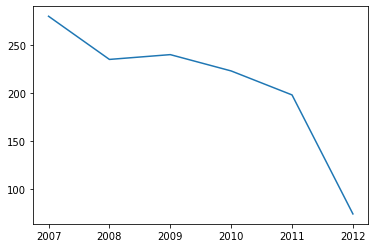

In [16]:
homi['found_datetime'].dt.year.value_counts().sort_index().plot(kind='line')

In [17]:
homi.groupby('gender').age.mean()

gender
Hispanic male      29.000000
Other male         25.500000
black female       33.294118
black male         27.413793
hispanic female    20.500000
white female       31.800000
white male         45.375000
Name: age, dtype: float64

In [18]:
homi.head()

,address,gender,age,found,death,cause,found_datetime
0,3400 Clifton Ave.,black male,17.0,"January 1, 2007",Shock Trauma,shooting,2007-01-01
1,4900 Challedon Road,black male,26.0,"January 2, 2007",scene,shooting,2007-01-02
2,2000 West North Ave,black female,44.0,"January 2, 2007",scene,blunt force,2007-01-02
3,5900 Northwood Drive,black male,21.0,"January 3, 2007",scene,asphyxiation,2007-01-03
4,500 Maude Ave.,white male,61.0,"January 5, 2007",scene,blunt force,2007-01-05


In [19]:
homi['address'].value_counts(dropna = False).head(11)

2900 Greenmount Ave       4
2100 Edmondson Ave        3
3200 Belair Rd            3
4300 Nicholas Ave         3
1100 N. Milton Ave        3
800 Bethune Road          3
3000 Baker St             3
2900 Garrison Blvd.       3
4000 Oakford Ave.         3
2500 Garrett Ave.         3
1300 Bloomingdale Road    2
Name: address, dtype: int64

In [20]:
def get_race(string):
    match = re.search(r'\w+ ', string)
    if match:
        return match.group()
    else:
        return np.nan

In [21]:
get_race('Black male')

'Black '

In [22]:
homi['racial'] = homi['gender'].astype(str).apply(get_race)
homi

,address,gender,age,found,death,cause,found_datetime,racial
0,3400 Clifton Ave.,black male,17.0,"January 1, 2007",Shock Trauma,shooting,2007-01-01,black
1,4900 Challedon Road,black male,26.0,"January 2, 2007",scene,shooting,2007-01-02,black
2,2000 West North Ave,black female,44.0,"January 2, 2007",scene,blunt force,2007-01-02,black
3,5900 Northwood Drive,black male,21.0,"January 3, 2007",scene,asphyxiation,2007-01-03,black
4,500 Maude Ave.,white male,61.0,"January 5, 2007",scene,blunt force,2007-01-05,white
...,...,...,...,...,...,...,...,...
1245,1000 Renick Ct,NaN,35.0,"January 8, 2012",Maryland Shock Trauma Center,Shooting,2012-01-08,NaN
1246,2400 Ashland Ave,NaN,27.0,"January 6, 2012",Johns Hopkins Hospital,Shooting,2012-01-06,NaN
1247,2600 E. Biddle St,NaN,84.0,"January 5, 2012",Scene,Stabbing,2012-01-05,NaN
1248,4000 Edgewood Rd,NaN,62.0,"January 3, 2012",Sinai Hospital,Shooting,2012-01-03,NaN


In [23]:
homi['racial'].value_counts(normalize=True)

black        0.932584
white        0.048689
Other        0.007491
hispanic     0.007491
Hispanic     0.003745
Name: racial, dtype: float64

<AxesSubplot:>

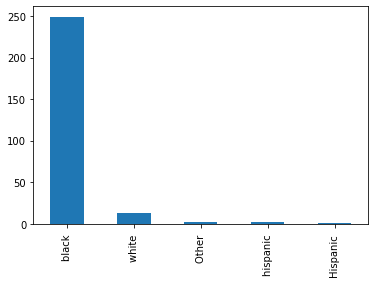

In [24]:
homi['racial'].value_counts().plot(kind='bar')

In [25]:
homi.groupby('racial').age.agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
racial,,,,
Hispanic,1,29.000000,29.0,29.0
Other,2,25.500000,33.0,18.0
black,249,27.815261,81.0,2.0
hispanic,2,20.500000,25.0,16.0
white,13,40.153846,65.0,18.0
